### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

### ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2


#### Дисциплина: Методы машинного обучения

##### Студент: Мухамедияр Адиль
##### Группа: НКНбд-01-20

## Москва 2023
***

# Постановка задачи:
В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:  

1) Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).

2) Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.

3) Постройте кривые обучения с зависимостью от количества эпох.

4) Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок.

5) Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании.

6) Визуализируйте этот признак в соответствии с индивидуальным заданием.

7) Сформируйте набор входных данных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков.

8) Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика.

9) Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве.

10) Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду. 

# Вариант №17



### Дополнение к основной задаче:

1. Набор данных: diamonds 

2. Независимая переменная: features/carat 

3. Зависимая переменная: price 

4. Доп. признак: имеющий максимальную дисперсию 

5. Визуализация доп. признака – эмпирическая функция распределения 

6. Показатель качества регрессии – MAE (mean absolute error) 

7. Степень полинома: 4 

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – relu. 

## Решение:

### Пункт 1

Исправляем ошибку при обращении к датасету:


In [2]:
!pip install -q tfds-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.8 MB/s eta 0:00:00


Добавляем библиотеки, которыми мы воспользуемся в дальнейшем:

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import cm
import tensorflow_datasets as tfds
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model


Считываем из TFDS набор данных "wine_quality":

In [4]:
ds = tfds.load("diamonds", split='train') 
ds

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/53940 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/diamonds/1.0.0.incomplete34KD46/diamonds-train.tfrecord*...:   0%|        …

Dataset diamonds downloaded and prepared to /root/tensorflow_datasets/diamonds/1.0.0. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec={'features': {'carat': TensorSpec(shape=(), dtype=tf.float32, name=None), 'clarity': TensorSpec(shape=(), dtype=tf.int64, name=None), 'color': TensorSpec(shape=(), dtype=tf.int64, name=None), 'cut': TensorSpec(shape=(), dtype=tf.int64, name=None), 'depth': TensorSpec(shape=(), dtype=tf.float32, name=None), 'table': TensorSpec(shape=(), dtype=tf.float32, name=None), 'x': TensorSpec(shape=(), dtype=tf.float32, name=None), 'y': TensorSpec(shape=(), dtype=tf.float32, name=None), 'z': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'price': TensorSpec(shape=(), dtype=tf.float32, name=None)}>

Преобразуем объект PrefetchDataset в датафрейм:

In [5]:
df = tfds.as_dataframe(ds)
df.head()


,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


Оценим размеры датафрейма и типы столбцов:

In [6]:
df.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   features/carat    53940 non-null  float32
 1   features/clarity  53940 non-null  int64  
 2   features/color    53940 non-null  int64  
 3   features/cut      53940 non-null  int64  
 4   features/depth    53940 non-null  float32
 5   features/table    53940 non-null  float32
 6   features/x        53940 non-null  float32
 7   features/y        53940 non-null  float32
 8   features/z        53940 non-null  float32
 9   price             53940 non-null  float32
dtypes: float32(7), int64(3)
memory usage: 2.7 MB


In [7]:
X = df['features/carat']
y = df['price']

### Пункт 2

Из библиотеки sklearn берем train_test_split для деление датасета на train и test. Следом создаем слой:

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1)

polynomial = PolynomialFeatures(degree=4)
X_train = polynomial.fit_transform(X_train.values.reshape(-1, 1))
X_test = polynomial.transform(X_test.values.reshape(-1, 1))

polynomial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=X_train.shape[1])
])
polynomial_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')
history = polynomial_model.fit(
    X_train, y_train, 
    epochs=100,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/100
1180/1180 [==============================] - 3s 2ms/step - loss: 36.9149 - val_loss: 22.1249
Epoch 2/100
1180/1180 [==============================] - 3s 3ms/step - loss: 12.3083 - val_loss: 7.0841
Epoch 3/100
1180/1180 [==============================] - 3s 3ms/step - loss: 5.1046 - val_loss: 3.3233
Epoch 4/100
1180/1180 [==============================] - 2s 2ms/step - loss: 2.2473 - val_loss: 1.7898
Epoch 5/100
1180/1180 [==============================] - 2s 2ms/step - loss: 1.7814 - val_loss: 1.7574
Epoch 6/100
1180/1180 [==============================] - 2s 2ms/step - loss: 1.7654 - val_loss: 1.7413
Epoch 7/100
1180/1180 [==============================] - 2s 2ms/step - loss: 1.7540 - val_loss: 1.7294
Epoch 8/100
1180/1180 [==============================] - 3s 3ms/step - loss: 1.7416 - val_loss: 1.7255
Epoch 9/100
1180/1180 [==============================] - 3s 3ms/step - loss: 1.7354 - val_loss: 1.7179
Epoch 10/100
1180/1180 [==============================] - 2s 2ms/step 

In [45]:
y_test_pred = polynomial_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('MAE:', mae_test)

506/506 [==============================] - 1s 1ms/step
MAE: 1.6926917


### Пункт 3

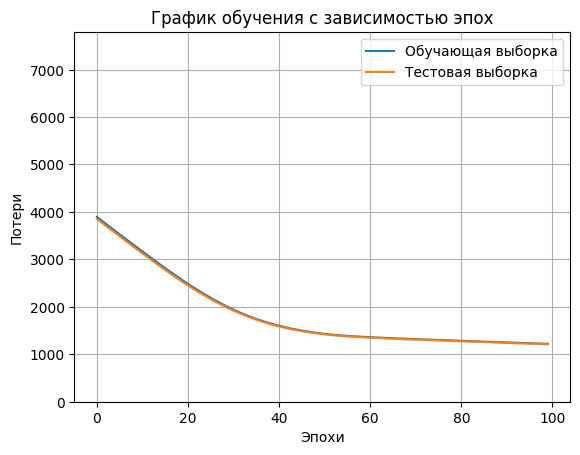

In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([0, max(history.history['loss'])*2])
  plt.title('График обучения с зависимостью эпох')
  plt.xlabel('Эпохи')
  plt.ylabel('Потери')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)

plot_loss(history)

Выше представленном графике можно заметить спад потерь примерно после 45-50 эпохи

### Пункт 4


In [23]:
y_train.shape

(37758,)

In [24]:
X_train.shape

(37758, 5)

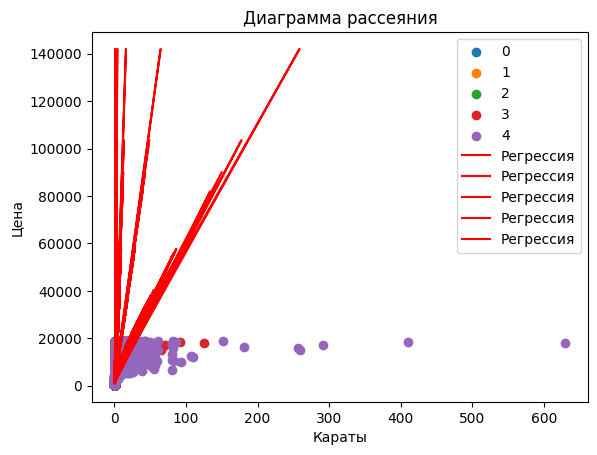

In [32]:
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], y_train, label='0') # Набор данных полинома с 0 степенью
ax.scatter(X_train[:, 1], y_train, label='1')
ax.scatter(X_train[:, 2], y_train, label='2')
ax.scatter(X_train[:, 3], y_train, label='3')
ax.scatter(X_train[:, 4], y_train, label='4')
ax.plot(X_test, y_test_pred, color='r', label=f'Регрессия')
ax.set_xlabel('Караты')
ax.set_ylabel('Цена')
ax.set_title('Диаграмма рассеяния')
ax.legend()
plt.show()

### Пункт 5


Выводим дисперсии признаков:

In [33]:
df.var()

features/carat      2.246867e-01
features/clarity    2.713057e+00
features/color      2.893757e+00
features/cut        1.246795e+00
features/depth      2.052404e+00
features/table      4.992948e+00
features/x          1.258347e+00
features/y          1.304472e+00
features/z          4.980108e-01
price               1.591563e+07
dtype: float64

Если не учитывать зависимую и независимую переменные, то признак с максимальной дисперсией будет *features/table*

### Пункт 6


In [34]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

samples = df['features/table'] # sepal length
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

df_ECDF = pd.DataFrame(ylist, columns=['features/table'],index=xlist)
df_ECDF


,features/table
43.000,0.000019
43.104,0.000019
43.208,0.000019
43.312,0.000019
43.416,0.000019
...,...
94.480,0.999981
94.584,0.999981
94.688,0.999981
94.792,0.999981


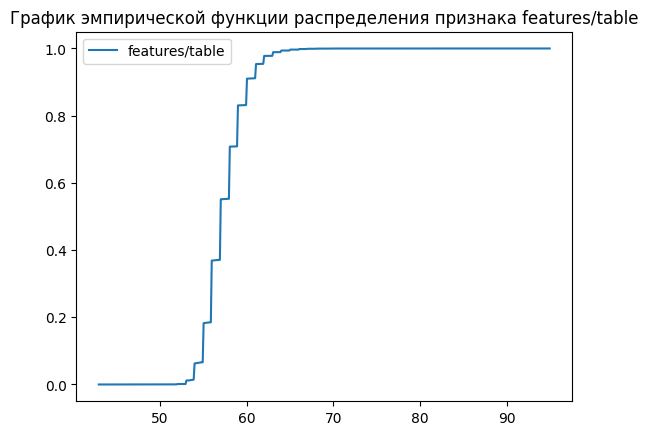

In [35]:
df_ECDF.plot.line(title='График эмпирической функции распределения признака features/table');

### Пункт 7

In [69]:
X = df[['features/carat', 'features/table']]
y = df['features/table']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1)

Используем слой нормализации, адаптированный к обоим независимым признакам:

In [70]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(X_train)

### Пункт 8

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37758, 2), (16182, 2), (37758,), (16182,))

Создадим нейронную сеть со слоем нормализации, четырьмя скрытыми плотными слоями с 64 нейронами и функцией активации ReLu и выходным слоем из одного нейрона:

In [73]:
large_model = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

large_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_39 (Dense)            (None, 64)                192       
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 1)                 65        
                                                     

Скомпилируем модель, используя в качестве функции потерь среднеквадратичную ошибку MSE с оптимизатором adam:

In [87]:
large_model.compile(loss='mse', optimizer='adam')

Обучим модель:

In [88]:
train_score = []
test_score = []
history=[]
for i in range(100, 37758, 10000):
    history.append(large_model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test)))
    y_train_predict = large_model.predict(X_train[:i])
    train_score.append(mean_absolute_error(y_train[:i], y_train_predict))
    y_test_predict = large_model.predict(X_test)
    test_score.append(mean_absolute_error(y_test, y_test_predict))
    print('-->', i, ' done')

Epoch 1/10
1180/1180 [==============================] - 5s 4ms/step - loss: 134.2768 - val_loss: 0.1599
Epoch 2/10
1180/1180 [==============================] - 4s 3ms/step - loss: 0.1480 - val_loss: 0.1688
Epoch 3/10
1180/1180 [==============================] - 5s 4ms/step - loss: 0.0623 - val_loss: 0.0357
Epoch 4/10
1180/1180 [==============================] - 4s 3ms/step - loss: 0.0232 - val_loss: 0.0086
Epoch 5/10
1180/1180 [==============================] - 3s 3ms/step - loss: 0.0213 - val_loss: 0.0047
Epoch 6/10
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0233 - val_loss: 0.0018
Epoch 7/10
1180/1180 [==============================] - 4s 3ms/step - loss: 0.0207 - val_loss: 0.0011
Epoch 8/10
1180/1180 [==============================] - 4s 3ms/step - loss: 0.0131 - val_loss: 0.0013
Epoch 9/10
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0176 - val_loss: 0.0031
Epoch 10/10
506/506 [==============================] - 1s 1ms/step
--> 100  done

### Пункт 9

313/313 [==============================] - 0s 1ms/step


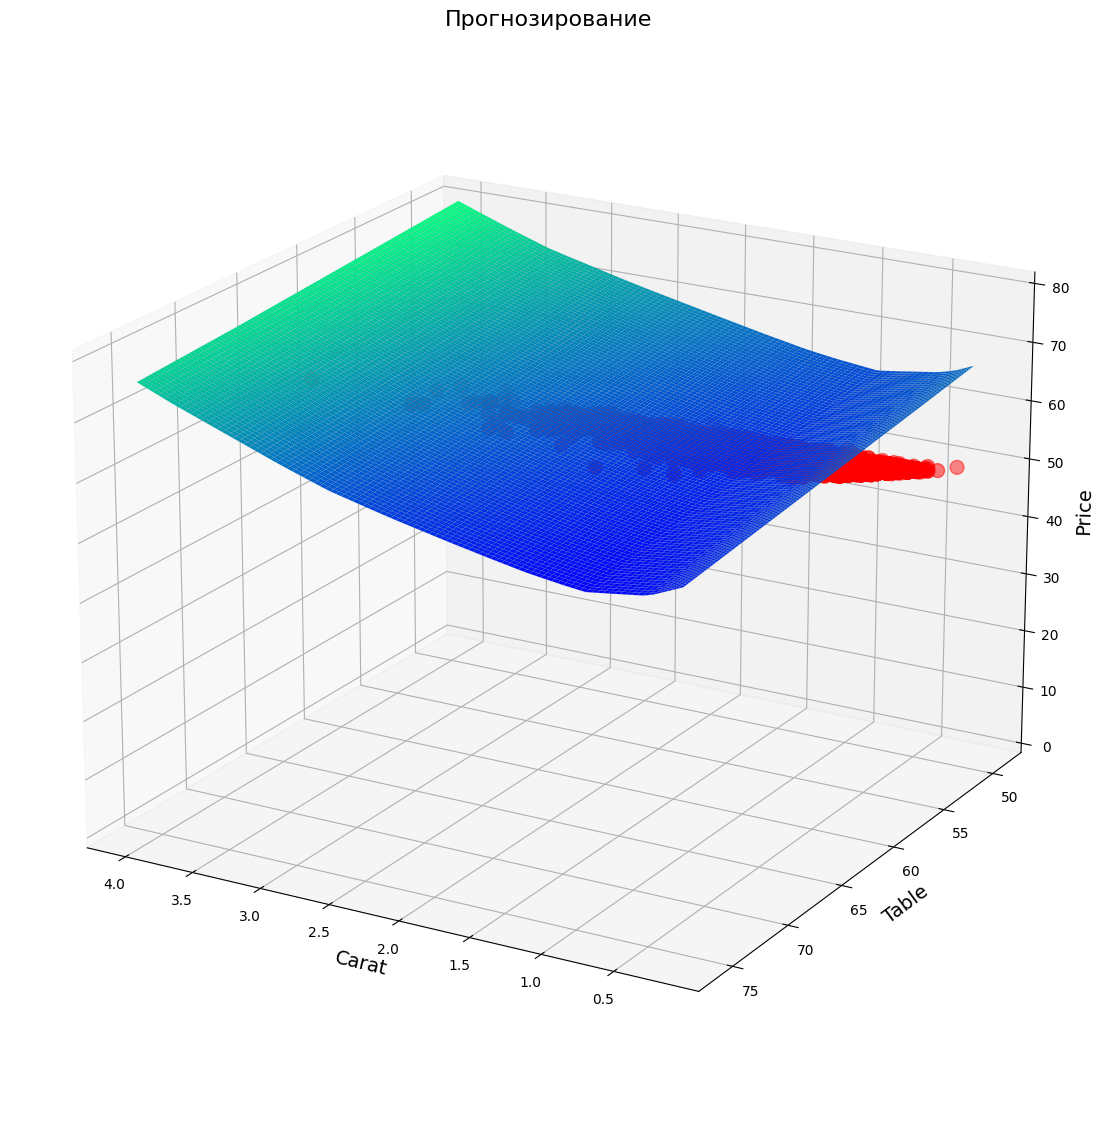

In [89]:
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')


x_mesh, y_mesh = np.meshgrid(np.linspace(X_test['features/carat'].min(), X_test['features/carat'].max(), 100), \
                             np.linspace(X_test['features/table'].min(), X_test['features/table'].max(), 100))
z_mesh = large_model.predict(normalizer(np.c_[x_mesh.ravel(), y_mesh.ravel()])).reshape(x_mesh.shape)

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True,edgecolors='gray') 

xs = X_test['features/carat']
ys = X_test['features/table']
zs = y_test
ax.scatter( xs, ys, zs, s=100, c='red' )

ax.set_xlabel('Carat', fontsize=14) 
ax.set_ylabel('Table', fontsize=14)
ax.set_zlabel('Price', fontsize=14) 
ax.set_title('Прогнозирование', fontsize=16)

ax.set_zlim(0., z_mesh.max())
ax.view_init(elev = 20, azim = 120)

plt.show()

### Пункт 10

In [91]:
len(train_score)

4

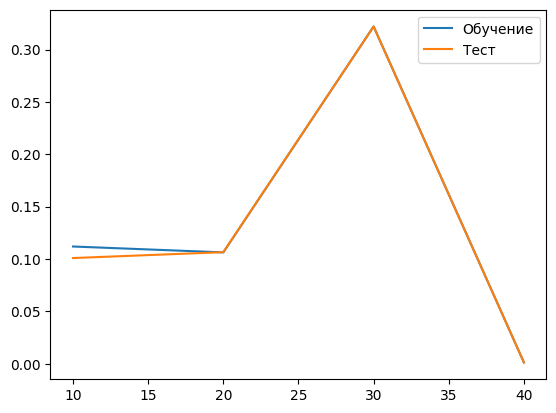

In [92]:
plt.plot([i for i in range(10, 41, 10)], 
         train_score, label="Обучение")
plt.plot([i for i in range(10, 41, 10)], 
         test_score, label="Тест")
plt.legend()